<a href="https://colab.research.google.com/github/Alexbox360/Data-Science/blob/main/DS_C3_SC1_JESUS_ALEJANDRO_MURILLO_PEREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [263]:
happiness = pd.read_csv('/content/0.d5dr8hkdtk70.h9w788m6qlrHappiness_report.csv')

A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.


In [264]:
happiness = happiness.set_index('Country or region')
Mexico = pd.DataFrame(happiness.iloc[happiness.index.get_loc('Mexico')])
Mexico = Mexico.T

Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(Mexico    6.595
Name: Score, dtype: float64, 1, 'Mexico')

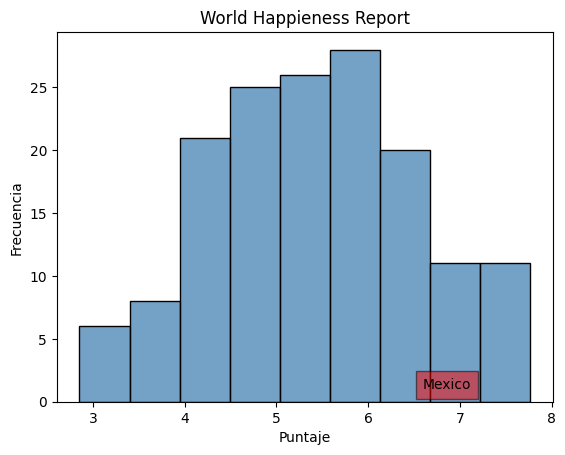

In [265]:
sns.histplot(x='Score',data=happiness, color = 'steelblue')
plt.title('World Happieness Report')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.text(Mexico['Score'], 1, 'Mexico', bbox={"facecolor": "Red", "pad": 5, "alpha" : 0.5})

Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

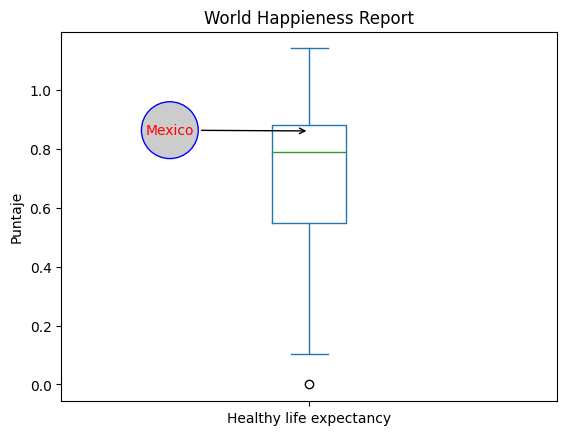

In [266]:
fig, ax = plt.subplots()
happiness['Healthy life expectancy'].plot.box(ax=ax, title='World Happieness Report')
ax.annotate("Mexico", color='red',xy=(1,Mexico['Healthy life expectancy']),xytext=(0.67,0.85),
            bbox = dict(boxstyle="circle",fc="0.8", edgecolor='blue'),arrowprops=dict(arrowstyle='->'))
plt.ylabel('Puntaje')
plt.show()

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

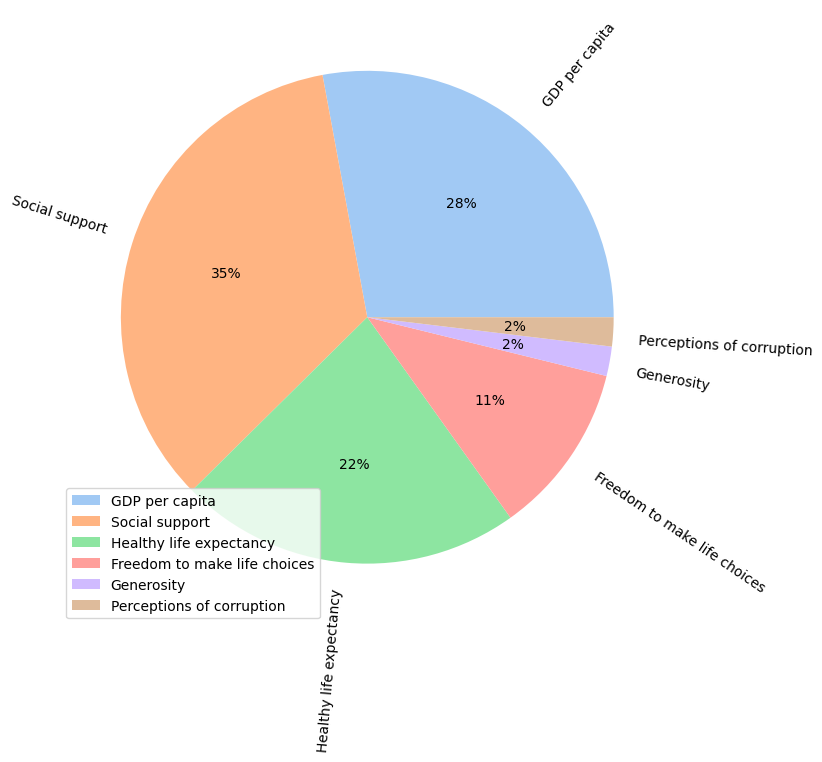

In [267]:
Mexico_pie = Mexico.drop(['Overall rank','Score'],axis=1)
Mexico_pie = Mexico_pie.T
colors = sns.color_palette('pastel')
Mexico_pie.columns = ['Factors']
fig, ax = plt.subplots()
Mexico_pie.plot.pie(y='Factors', labels=Mexico_pie.index, colors=colors, rotatelabels=True, autopct='%.0f%%',figsize=(8,8),ylabel='', ax = ax)
ax.legend(loc="lower left")

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

Text(0, 0.5, 'Puntaje')

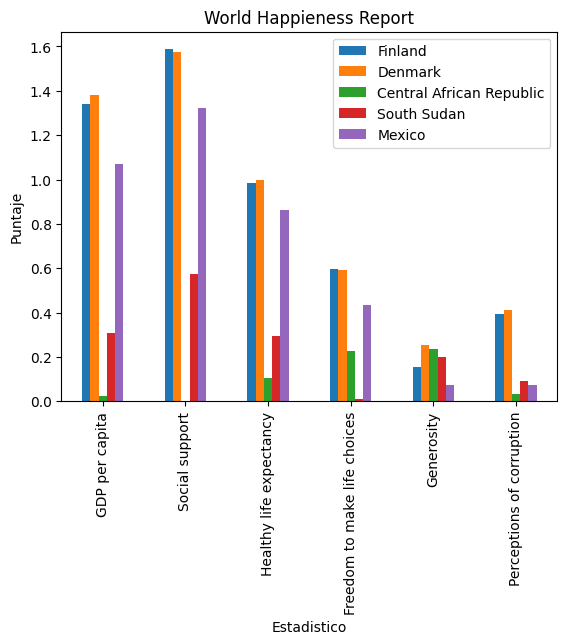

In [268]:
Paises_interes = happiness.head(2)
Paises_interes = pd.concat([Paises_interes, happiness.tail(2)])
Paises_interes = pd.concat([Paises_interes,Mexico])
Paises_interes = Paises_interes.drop(['Overall rank', 'Score'], axis=1)
Paises_interes.T.plot.bar()
plt.title('World Happieness Report')
plt.xlabel('Estadistico')
plt.ylabel('Puntaje')

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

Text(0.5, 1.0, 'Correlacion de los datos')

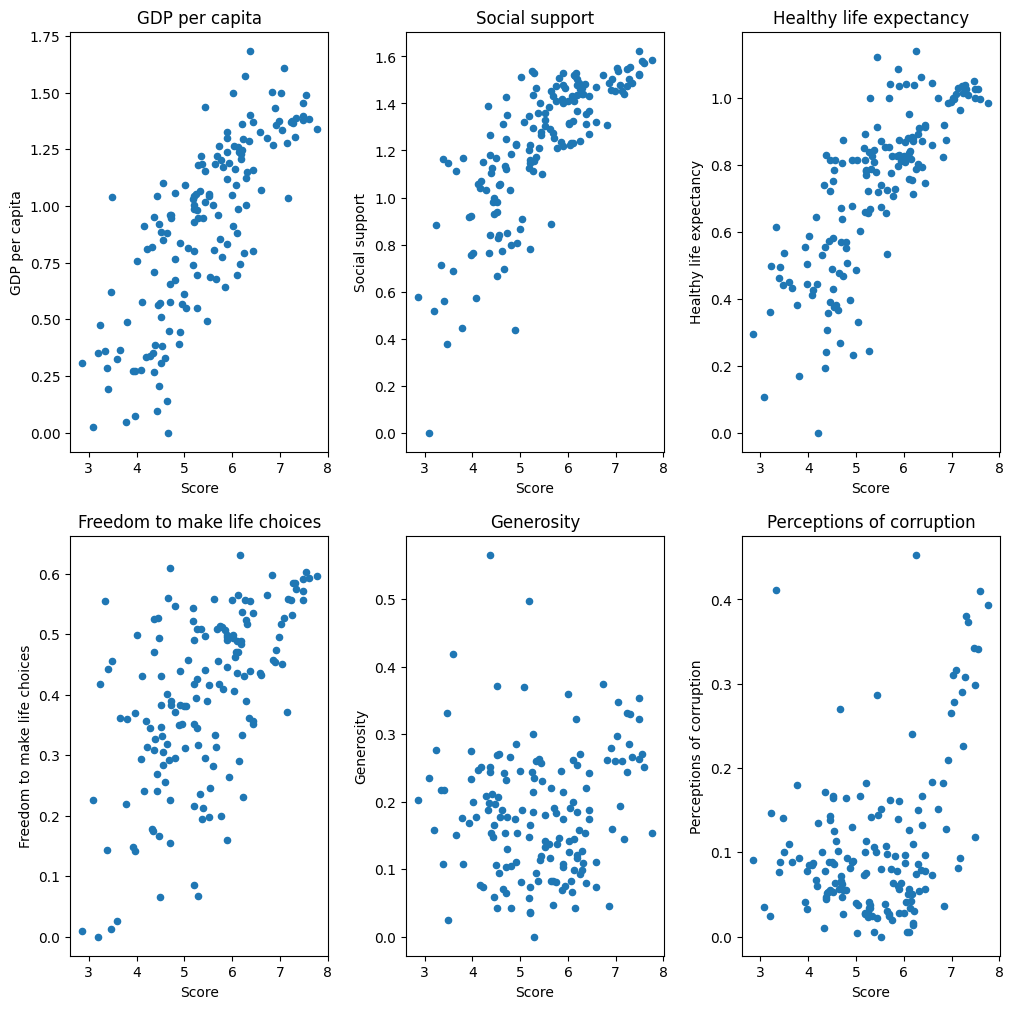

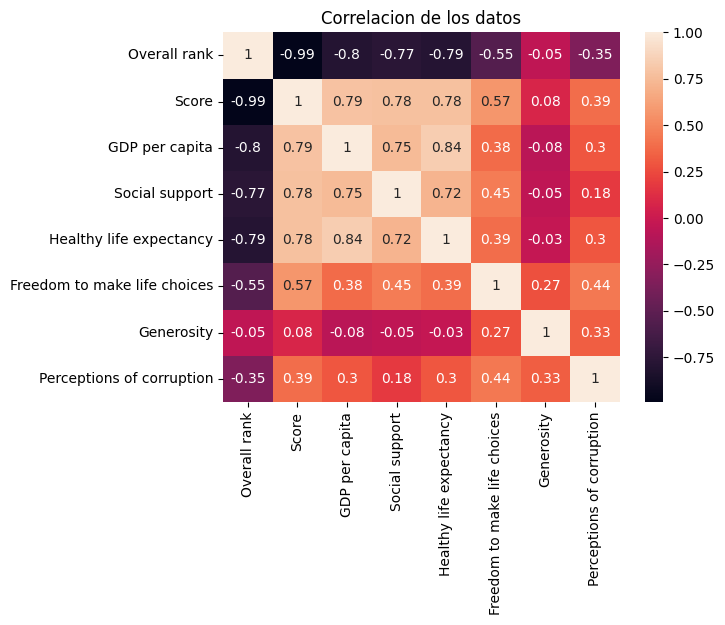

In [289]:
fig, axs = plt.subplots(2,3,figsize=(12,12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
Lista = ['GDP per capita',	'Social support',	'Healthy life expectancy',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']
Lista = np.array(Lista).reshape(2,3)
for i in range(2):
  for j in range(3):
    happiness.plot.scatter(ax = axs[i,j], x='Score',y=str(Lista[i,j]))
    axs[i,j].set_title(str(Lista[i,j]))
fig1, ax1 = plt.subplots()
sns.heatmap(round(happiness.corr(),2), annot=True, ax = ax1)
ax1.set_title('Correlacion de los datos')

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

Text(0.5, 1.0, 'World Happieness Report')

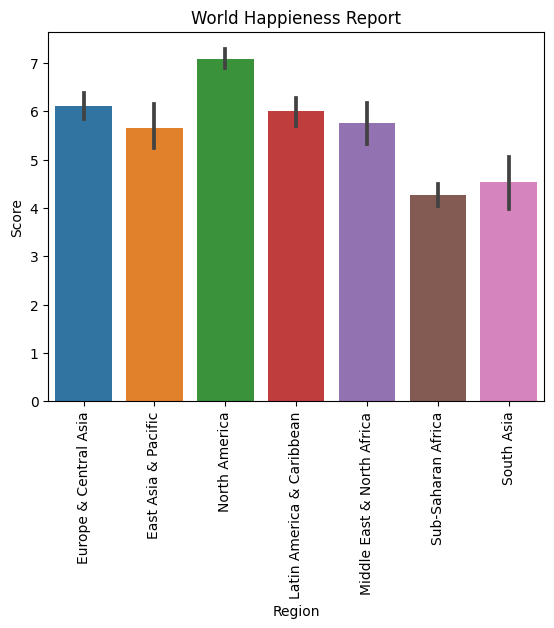

In [299]:
Metadata = pd.read_csv('/content/0.82rdpda1oq20.on98sq47leMetadata.csv')
Metadata = Metadata.rename(columns={'TableName':'Country or region'})
Combi = happiness.merge(Metadata, on='Country or region')
ax = sns.barplot(x='Region', y='Score', data=Combi)
plt.xticks(rotation=90)
ax.set_title('World Happieness Report')